### __Python Data Visualization Graphs__

.plot(kind= ' ') is part of Pandas plotting which uses Matplotlib

'line'	Default. Line plot.

'bar'	Vertical bar chart

'barh'	Horizontal bar chart

'hist'	Histogram (frequency distribution)

'box'	Boxplot (summary of quartiles)

'kde' or 'density'	Kernel Density Estimate (smooth curve)

'area'	Area plot (stacked by default)

'pie'	Pie chart (works only with Series)

'scatter'	Scatter plot (requires x= and y=)

'hexbin'	Hexagonal binning plot (for dense 2D data), like millions of points. It creates a honeycomb-looking heatmap of point density.

df.plot(kind='hexbin', x='a', y='b', gridsize=20)

##### _Scatter Plots_

An important part of exploratory data analysis is developing an understanding of the relationships between variables (i.e., columns) in our data.

You might need, for example, to better understand the relationship between height and weight, between temperature and ice cream sales, the relationship between educational level and salary, or the relationship between study hours and test scores. Scatter plots are an excellent way to visualize these relationships.

A scatter plot is simply a graph where a single point is plotted for each set of variables, but the points are not connected by lines.

To further illustrate the usefulness of scatter plots, let's examine a data set of heights and weights for 10,000 adults in the U.S. We'll start, as usual, by reading the data, displaying the first few rows, and visualizing general information about the data set.

In [2]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

print(df.head())
print()
df.info()

      height      weight  age  male
0  67.345391  151.163975   26     0
1  69.131220  203.525148   44     1
2  67.710271  205.752354   42     1
3  62.412362  117.148813   27     0
4  72.967492  229.394555   49     1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10000 non-null  float64
 1   weight  10000 non-null  float64
 2   age     10000 non-null  int64  
 3   male    10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


The data has four columns and 10,000 rows, with no missing values. Each row contains data collected for a single individual. The columns are:

'height': The person's height, in inches.

'weight': The person's weight, in pounds.

'age': The person's age, in years.

'male': The person's sex, where 1 = male and 0 = female.

Let's look at a numerical description of the data:

In [4]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

print(df.describe())

             height        weight           age          male
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      66.367560    164.157357     37.507000      0.500000
std        4.284200     33.881810      7.495236      0.500025
min       53.663133     63.700127     25.000000      0.000000
25%       63.029487    137.599803     31.000000      0.000000
50%       66.276290    163.565827     37.000000      0.500000
75%       69.676237    191.227505     44.000000      1.000000
max       79.598742    280.989699     50.000000      1.000000


How to understand std?
Think of it like this:

- A small std means that your values are close to the mean → low variability.
- A large std means your values are spread out → high variability.

How to interpret 25,50,75%?
Think of your data sorted from smallest to largest.

25% → One quarter of your data is below this value.

50% → Half the data is below this value → this is the median.

75% → Three quarters of your data is below this value.

It’s like slicing your data into four equal parts.

From the result of describe(), we can determine that the age range of adults in the dataset is 25 to 50 years. The _"male" column_ is included in the output because it is a Python numeric data type, but we must __remember that it is a categorical variable__, so we shouldn't overemphasize this information.

Now that we have some summary statistics, let's use visualization to better understand the data. First, let's investigate the relationship between height and weight.

We'll start by using the default behavior of the plot() method to create a line chart, plotting height and weight on the X and Y axes, respectivel

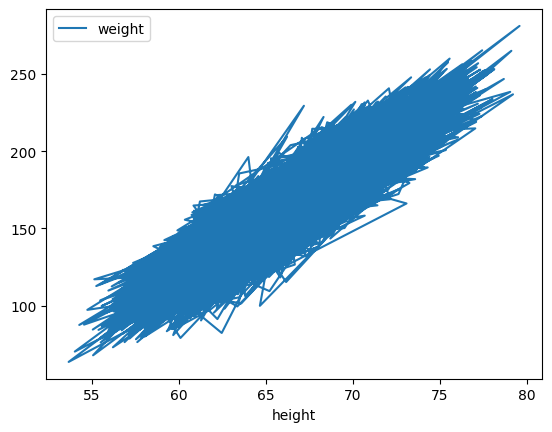

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(x='height', y='weight')
plt.show()

Oops! What a mess! Why does our graph look like this?

By default, the plot() method creates a line graph by going through each row of the DataFrame in order. For each row, a point is plotted, and this point is connected to the previous one using a line.

Since our DataFrame isn't sorted by any particular column, the points are all over the place and the lines connecting them don't make sense, causing this clutter in the graph.

Let's sort our data by height and plot it again to see if we can improve the graph:

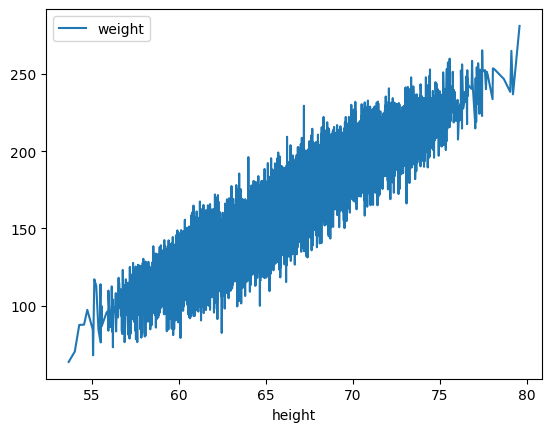

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.sort_values('height').plot(x='height', y='weight')
plt.show()

That's progress, but connecting data points with lines is pointless, since one person's height and weight are unrelated to another's height and weight. Each data point represents a discrete, independent measurement.

When deciding what type of chart to use for your data, it's important to consider what each data point represents and how it relates to the next. This should be the first thing you think about when choosing a chart for your presentation.

In this case, it's best to use individual points to plot discrete data like this. And that's exactly where scatter plots come in. With a scatter plot, you don't need to sort the data; the plot will look exactly the same no matter how the rows are sorted in the DataFrame. This also addresses the issue of the relationship between data points, since there is no visible relationship embedded in the scatter plot.

In the previous lesson, we learned an indirect way to create scatter plots by including certain arguments for the style= parameter.

For example, we can use 'or' to make a scatter plot where each point is marked with a circle:

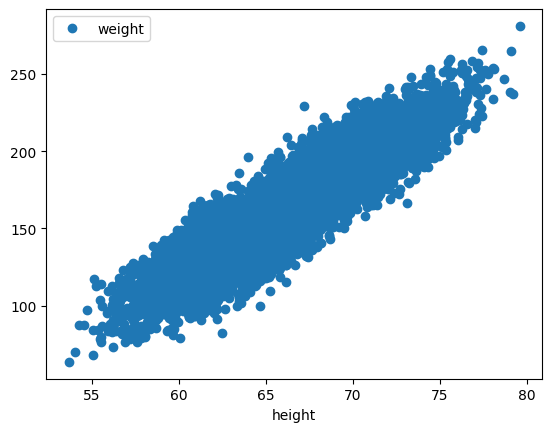

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(x='height', y='weight', style='o')
plt.show()

Each data point is now plotted independently, making it clear that there is a relationship between weight and height. The scatter plot also allows us to easily identify outliers. However, there is an even better way to create scatter plots using Pandas.

We can create a scatter plot directly using the kind= parameter in plot().

This parameter tells plot() what type of plot to create. In this case, we use the 'scatter' argument to create a scatter plot.

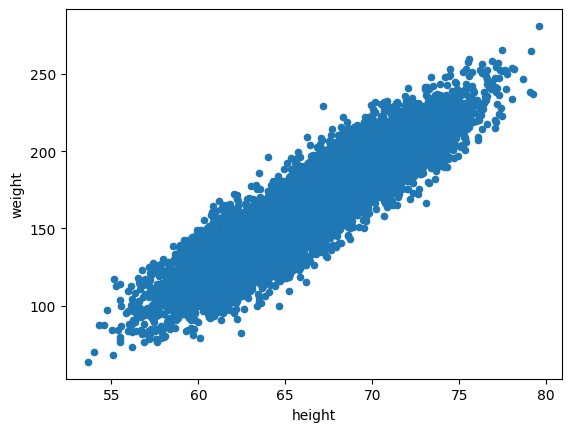

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(x='height', y='weight', kind='scatter')
plt.show()

The data points are almost identical in both charts. The points in the second chart are slightly smaller than those in the first, but do you notice any other differences between these two ways of creating a scatter plot?

If we don't specify kind='scatter', then the Y-axis is unlabeled by default, and we also have an unnecessary legend. By explicitly creating a scatter plot, it's already nicely formatted with labeled axes.

There's just one last thing to talk about regarding scatter plots. With so many points, many of them overlap, making it difficult to get a good idea of ​​the point density in the previous chart.

However, we can work around this problem by using the alpha= parameter. This parameter governs the transparency of the points and can accept any value between __0 (completely transparent) and 1 (not at all transparent)__. By default, it's set to 1, indicating no transparency.

As the value decreases, each point becomes dimmer, and it's easier to see where the greatest density of points is. The trade-off is that it becomes harder to see the points at the extremes of the distribution. The best alpha value to use is really a matter of taste and what you want to emphasize with your chart.

_alpha=_ sets the transparency of the points in the chart to the specified value.

##### _Excercise 01_

To make the analysis more interesting and easier to understand, we'll use the same data set as before, but this time we'll analyze height versus age instead of weight. You'll create a scatter plot that shows the relationship between these two variables.

Use the kind='scatter' argument to create the desired scatter plot. Give the plot the following arguments:

- The title "Adult heights" (case is important).
- Alpha value of 0.36.
- Plot size of 8 by 6 inches.
- X-axis labeled "Age / years".
- Y-axis labeled "Height / inches".

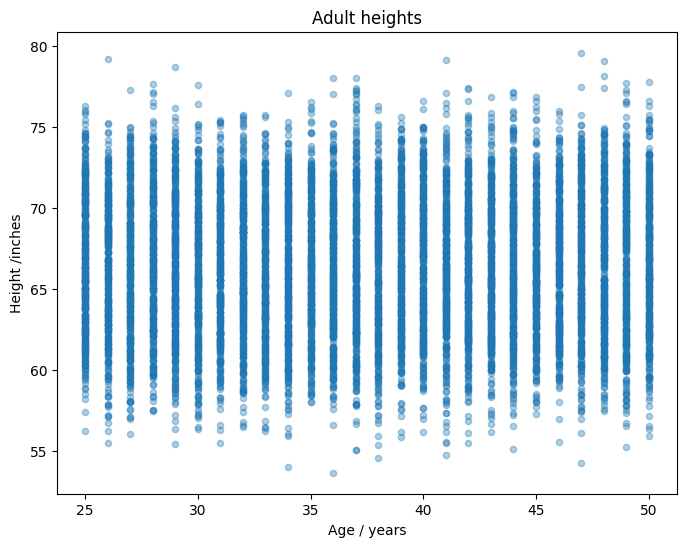

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(title='Adult heights', x='age', y='height', kind='scatter', alpha=0.36, figsize=[8, 6], xlabel="Age / years", ylabel="Height /inches")

plt.show()

Often, the main objective of data analysis is to show the relationship between two variables. For example, we may want to determine how the price of an apartment relates to its size. Does distance from the city center affect its value? What impact does the year of construction or the noise level of the neighborhood have? Scatter plots help us answer these questions by providing a visual representation of these relationships.

The tendency of one variable to change in relation to a change in another variable is called correlation.

The scatter plots we made in the last lesson show that height and weight are positively correlated. This makes sense because an increase in one generally means an increase in the other. An example of a negative correlation would be height and voice pitch; generally, the taller a person is, the lower the pitch of their voice.

##### _Correlation Coefficient_

It's one thing to look at the graph, but we also need a numerical form to describe the correlation.

To quantify how one variable tends to change when the other variable changes, we use __Pearson's correlation coefficient__, commonly known as the __correlation coefficient__. _This coefficient can take any value between -1 and 1._

A value of -1 represents a perfect negative linear correlation, while a value of 1 represents a perfect positive linear correlation. In general, the correlation coefficient works like this:

- If one of the values ​​increases along with the other, the correlation coefficient is positive.
- If one stays the same while the other changes, the coefficient is 0.
- If one decreases while the other increases, the coefficient is negative.

The closer the coefficient is to -1 or 1, the stronger the correlation. On the other hand, a value of 0 can mean no correlation or a complex nonlinear connection that the coefficient cannot reflect.

![Graphs](Pics/PearsonCorrelation.jpg)

##### _Calculating the Correlation Coefficient_

In Pandas, you can calculate _Pearson's correlation coefficient using the corr() method._ To do this, apply it to the column with the first variable and pass the column with the second variable as a parameter. The order of the variables doesn't matter. For example:

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

print(df['height'].corr(df['weight']))

0.9165261045538688


With a coefficient of around 0.9, height and weight have a strong positive correlation in this data set. This is consistent with our "common sense" that taller people tend to weigh more. Of course, there is variation in this tendency, so we wouldn't expect a perfect positive correlation coefficient of 1.

It may be tempting to make a statement like "a person's height determines their weight." However, on its own, correlation can't tell us anything about cause and effect; we only know that the two factors are correlated. To prove (or disprove) cause and effect, we would need to conduct controlled experiments. Remember, correlation does not imply causation.

##### _Exercise 02_

Remember the scatter plot you made in the last lesson for the 'height' and 'age' columns? Now you're going to calculate the Pearson correlation coefficient for those columns and assign the result to a variable called ah_corr. Then display it. Does the result align with the scatter plot?

In [17]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

ah_corr = df['height'].corr(df['age'])

print(ah_corr)

0.010042046516844347


Try calling the corr() method on the entire DataFrame. To do this, follow the same process as before, but don't pass any variables to the DataFrame df or the corr() method. What happens? Print the result.

In [18]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

ah_corr = df.corr()
print(ah_corr)

          height    weight       age      male
height  1.000000  0.916526  0.010042  0.760690
weight  0.916526  1.000000  0.228538  0.785218
age     0.010042  0.228538  1.000000  0.004750
male    0.760690  0.785218  0.004750  1.000000


It looks like pandas returned a DataFrame with the correlation coefficients for each pair of variables. Great! We'll learn more about that in the next lesson.

##### _Scatter Matrices_

Creating Scatter Matrices

In the previous lesson, we found a strong correlation between height and weight, but in real life, things are rarely that simple. If we are interested in exploring the factors that contribute to people's weight, there is much more to consider than height. For example, we might also want to know how age and sex correlate with weight, or how they correlate with each other.

Unfortunately, it is impossible to plot all four parameters on the same graph consistently. However, we can create scatter plots for every possible pair of parameters: height and weight, height and age, weight and sex, and so on. _This set of pairwise plots is called a scatter matrix._

In Pandas, we can build scatter matrices using the _plotting.scatter_matrix()_ function

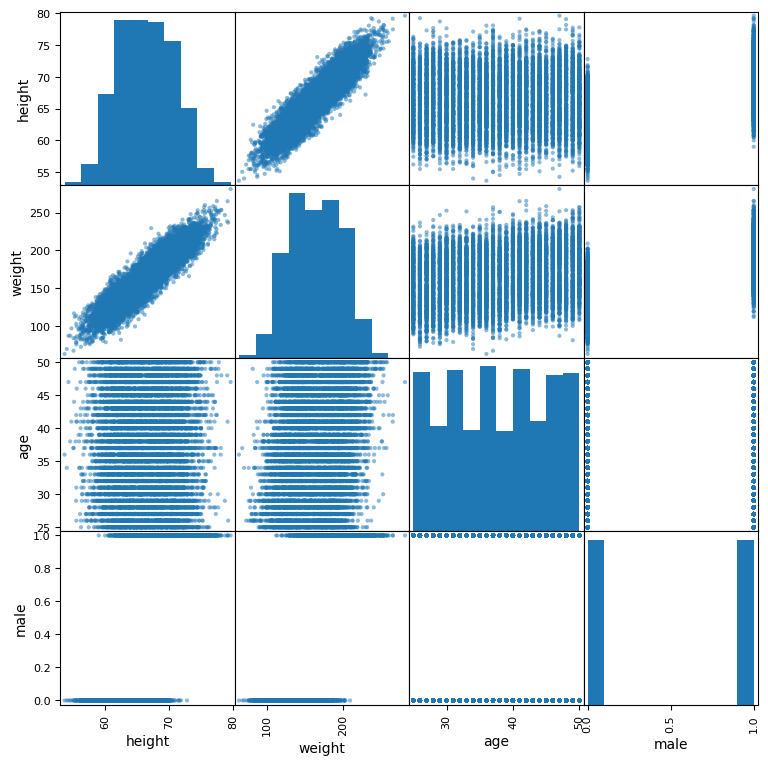

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

pd.plotting.scatter_matrix(df, figsize=(9, 9))
plt.show()

Each cell in this 4x4 grid shows the relationship between a pair of columns. Let's break it down. We'll show each graph below the explanation, and you can find it again in the matrix for your own reference.

The diagonal cells don't show the relationships between variables. Instead, there are histograms that show the distribution of values ​​for each individual variable. For example, examine the first image above. There we can see that adults are typically between 64 and 68 inches tall. We'll study histograms in more detail in the final chapter.

<img src="Pics/DiagCorScatter.jpg" width="400" height="300" />

Las celdas que están justo debajo y al lado del histograma de altura muestran la conexión entre altura y peso. Ambos gráficos de dispersión de altura-peso contienen información idéntica, pero los ejes simplemente están invertidos. Vimos este gráfico de dispersión en la última lección, y determinamos que es indicativo de una fuerte correlación positiva (un coeficiente de correlación de aproximadamente 0.9).

![Graphs](Pics/hwScatter.jpg)

Scatter plots for the age-height relationship show a wide scattering of points with no clearly discernible relationship, as you could see when you created this scatter plot and calculated the coefficient of relationship (about 0.01) in the previous lessons.

![Graphs](Pics/haScatter.jpg)

The age-weight scatterplots also have a wide spread of weights for each age, but there appears to be a slight positive trend for the age-height scatterplots.

![Graphs](Pics/awScatter.jpg)

The last row (and last column) of the scatter plots show the relationship between gender and the other variables, where a value of 1 means the person is male and 0 means female. These plots show a positive correlation in the gender-height and gender-weight relationships, but not in the gender-age relationships.

![Graphs](Pics/gender.jpg)

With a single line of code, we created a scatter plot matrix that allowed us to make many inferences about the relationships between the variables in our data set. Don't you think it would be great if we could quantify all these relationships as well?


##### _Box Plot_

            score
count   10.000000
mean    91.500000
std     24.272756
min     65.000000
25%     76.250000
50%     87.500000
75%     98.750000
max    150.000000



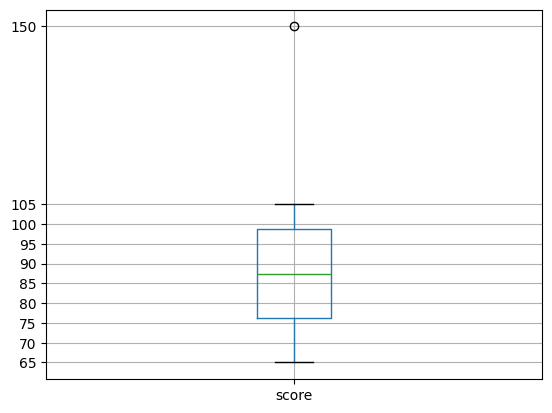

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'score': [65, 70, 75, 80, 85, 90, 95, 100, 105, 150]})
plt.yticks([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 150])
print(df.describe())
print()
df.boxplot(column='score', grid=True)
plt.show()

What each part means:

- Box (Q1 to Q3): Middle 50% of the data (called Interquartile Range or IQR).
- Line in the box (Q2): The median (middle value).
- Whiskers: Stretch from the box to the lowest and highest values within 1.5 × IQR.
- Dots outside whiskers: Outliers — values far from the rest.

Real-life example
Imagine analyzing monthly sales:

sales = [10, 12, 15, 20, 22, 24, 28, 30, 50, 95]

- Q1 = 15
- Q2 (median) = 22
- Q3 = 30
- IQR = Q3 - Q1 = 15

- Whiskers:
* Lower: Q1 - 1.5×IQR = 15 - 22.5 = outlier if < -7.5
* Upper: Q3 + 1.5×IQR = 30 + 22.5 = 52.5 → 95 is an outlier

So the box shows the stable sales range, and the 95 shows an exceptional spike.